In [18]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
print(requests.__version__)
# Import linregress
from scipy.stats import linregress

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the API key.
from config import weather_api_key

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

2.26.0


In [2]:
# Create a set of random latitude and longitude combinations.
np.random.seed(100)
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [3]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in lat_lngs:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

597

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | arraial do cabo
Processing Record 3 of Set 1 | vilhena
Processing Record 4 of Set 1 | fairbanks
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | ajdabiya
Processing Record 8 of Set 1 | tilichiki
Processing Record 9 of Set 1 | kolokani
Processing Record 10 of Set 1 | aklavik
Processing Record 11 of Set 1 | cidreira
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | khatanga
Processing Record 16 of Set 1 | grand centre
City not found. Skipping...
Processing Record 17 of Set 1 | thompson
Processing Record 18 of Set 1 | vaini
Processing Record 19 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 20 of Set 1 | vardo
Processing Record 21 of Set 1 | novobiryusinskiy
Processing Record 22 o

Processing Record 37 of Set 4 | chicama
Processing Record 38 of Set 4 | semenivka
Processing Record 39 of Set 4 | baherden
Processing Record 40 of Set 4 | mareeba
Processing Record 41 of Set 4 | taolanaro
City not found. Skipping...
Processing Record 42 of Set 4 | voznesenskoye
Processing Record 43 of Set 4 | aden
Processing Record 44 of Set 4 | qatana
Processing Record 45 of Set 4 | safranbolu
Processing Record 46 of Set 4 | bundaberg
Processing Record 47 of Set 4 | vestmannaeyjar
Processing Record 48 of Set 4 | nikolskoye
Processing Record 49 of Set 4 | svetlogorsk
Processing Record 50 of Set 4 | sao felix do xingu
Processing Record 1 of Set 5 | kumylzhenskaya
Processing Record 2 of Set 5 | muravlenko
Processing Record 3 of Set 5 | williams lake
Processing Record 4 of Set 5 | port blair
Processing Record 5 of Set 5 | dingle
Processing Record 6 of Set 5 | canberra
Processing Record 7 of Set 5 | praia
Processing Record 8 of Set 5 | caravelas
Processing Record 9 of Set 5 | stepnyak
Proc

Processing Record 24 of Set 8 | karratha
Processing Record 25 of Set 8 | srednekolymsk
Processing Record 26 of Set 8 | trairi
Processing Record 27 of Set 8 | bandarbeyla
Processing Record 28 of Set 8 | yantal
Processing Record 29 of Set 8 | pringsewu
Processing Record 30 of Set 8 | port hedland
Processing Record 31 of Set 8 | palmer
Processing Record 32 of Set 8 | salinas
Processing Record 33 of Set 8 | vila franca do campo
Processing Record 34 of Set 8 | oktyabrskoye
Processing Record 35 of Set 8 | east london
Processing Record 36 of Set 8 | craig
Processing Record 37 of Set 8 | hasaki
Processing Record 38 of Set 8 | parchim
Processing Record 39 of Set 8 | awjilah
Processing Record 40 of Set 8 | bengkulu
Processing Record 41 of Set 8 | maceio
Processing Record 42 of Set 8 | kropotkin
Processing Record 43 of Set 8 | saint-jerome
Processing Record 44 of Set 8 | naas
Processing Record 45 of Set 8 | rio grande
Processing Record 46 of Set 8 | ust-ishim
Processing Record 47 of Set 8 | bolun

Processing Record 15 of Set 12 | riyadh
Processing Record 16 of Set 12 | gardan diwal
City not found. Skipping...
Processing Record 17 of Set 12 | yanan
City not found. Skipping...
Processing Record 18 of Set 12 | aflu
City not found. Skipping...
Processing Record 19 of Set 12 | cornwall
Processing Record 20 of Set 12 | emba
Processing Record 21 of Set 12 | urengoy
Processing Record 22 of Set 12 | nhulunbuy
Processing Record 23 of Set 12 | yekaterinovka
Processing Record 24 of Set 12 | mossendjo
Processing Record 25 of Set 12 | barkhan
Processing Record 26 of Set 12 | natubleng
Processing Record 27 of Set 12 | nortelandia
Processing Record 28 of Set 12 | alta floresta
Processing Record 29 of Set 12 | shache
Processing Record 30 of Set 12 | ebensee
Processing Record 31 of Set 12 | fallon
Processing Record 32 of Set 12 | kurilsk
Processing Record 33 of Set 12 | gander
Processing Record 34 of Set 12 | fonte boa
Processing Record 35 of Set 12 | manzhouli
Processing Record 36 of Set 12 | ro

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.8000,-139.0333,79.07,68,79,16.15,PF,2022-05-17 20:14:47
1,Arraial Do Cabo,-22.9661,-42.0278,73.26,68,20,10.36,BR,2022-05-17 20:14:47
2,Vilhena,-12.7406,-60.1458,76.30,45,59,5.93,BR,2022-05-17 20:14:48
3,Fairbanks,64.8378,-147.7164,52.25,61,40,8.05,US,2022-05-17 20:11:37
4,Bluff,-46.6000,168.3333,41.81,81,80,11.01,NZ,2022-05-17 20:14:48
5,Albany,42.6001,-73.9662,66.94,50,31,4.00,US,2022-05-17 20:13:26
6,Ajdabiya,30.7554,20.2263,71.78,57,0,9.82,LY,2022-05-17 20:14:49
7,Tilichiki,60.4667,166.1000,31.41,100,100,0.81,RU,2022-05-17 20:14:50
8,Kolokani,13.5728,-8.0339,94.93,17,79,5.91,ML,2022-05-17 20:14:50
9,Aklavik,68.2191,-135.0107,31.19,95,100,14.45,CA,2022-05-17 20:14:50


In [9]:
city_data_df = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Atuona,PF,2022-05-17 20:14:47,-9.8000,-139.0333,79.07,68,79,16.15
1,Arraial Do Cabo,BR,2022-05-17 20:14:47,-22.9661,-42.0278,73.26,68,20,10.36
2,Vilhena,BR,2022-05-17 20:14:48,-12.7406,-60.1458,76.30,45,59,5.93
3,Fairbanks,US,2022-05-17 20:11:37,64.8378,-147.7164,52.25,61,40,8.05
4,Bluff,NZ,2022-05-17 20:14:48,-46.6000,168.3333,41.81,81,80,11.01
5,Albany,US,2022-05-17 20:13:26,42.6001,-73.9662,66.94,50,31,4.00
6,Ajdabiya,LY,2022-05-17 20:14:49,30.7554,20.2263,71.78,57,0,9.82
7,Tilichiki,RU,2022-05-17 20:14:50,60.4667,166.1000,31.41,100,100,0.81
8,Kolokani,ML,2022-05-17 20:14:50,13.5728,-8.0339,94.93,17,79,5.91
9,Aklavik,CA,2022-05-17 20:14:50,68.2191,-135.0107,31.19,95,100,14.45


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

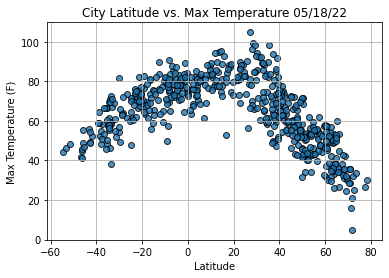

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

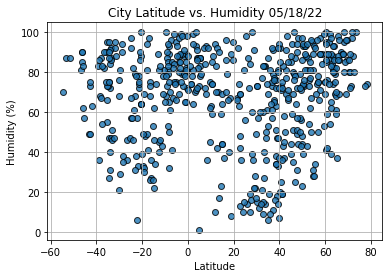

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

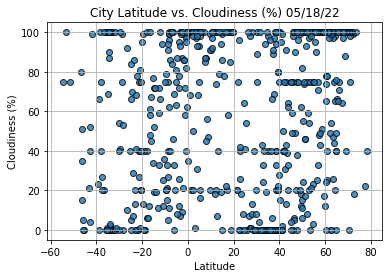

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

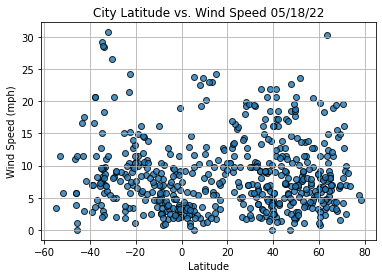

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [40]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    #regress_values = [x_values * slope + intercept]
    regress_values = [(x * slope + intercept) for x in x_values]
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) + ", r=", str(round(r_value,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

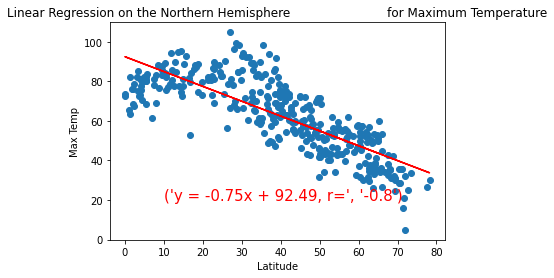

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,20))

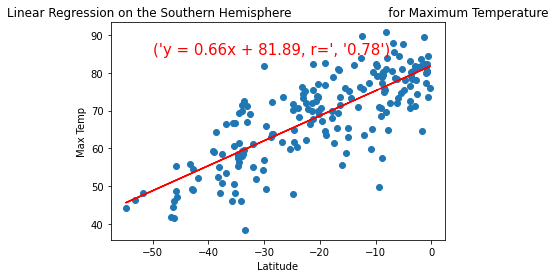

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,85))

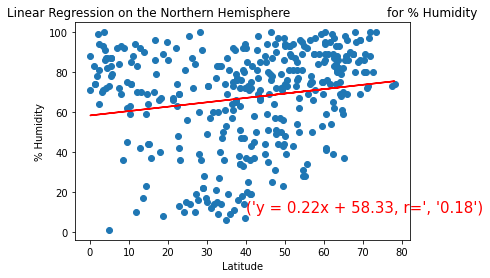

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

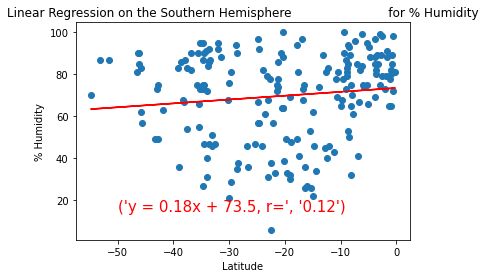

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

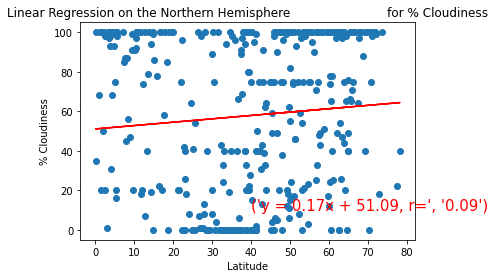

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

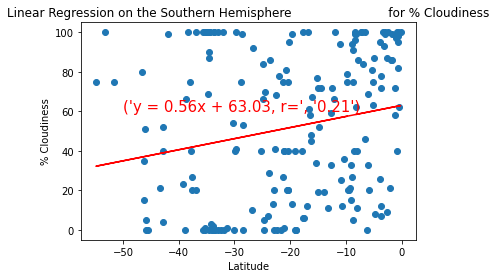

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

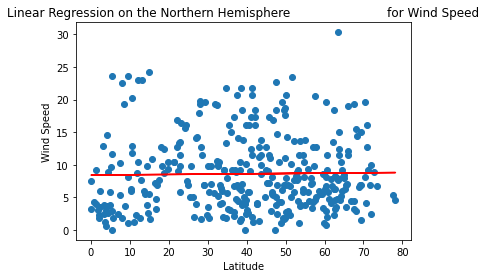

In [58]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,90))

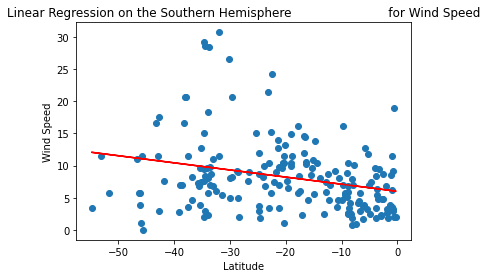

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))